## List

- Internal implementation
    - Are dynamic arrays
    https://en.wikipedia.org/wiki/Dynamic_array
    - http://www.laurentluce.com/posts/python-list-implementation/

- append time complexity O(1) unless needs resizing, then its O(n)
https://stackoverflow.com/questions/17635811/why-l-insert0-i-is-slower-than-l-appendi-in-python
- insert at begining is always O(n) because every subseeuqent elemt must be moved +1 to the right first
- pop complexity is O(1). If new size is less than allocated size then list is shrunk also
- remove complexity is O(n). pop() for an arbitrary element to be O(N)  require on average N/2 operations since you would need to move any elements beyond the element you are removing one position up in the array of pointers.

AMORTISED O(1) not O(1)
https://stackoverflow.com/questions/33044883/why-is-the-time-complexity-of-pythons-list-append-method-o1

## Linked List  (single or double)

- Better than list for inserting elements in the top. you can add elements to the list anywhere and it will be constant time, cuz you're just repointing nodes.
- Worse that lists in element retrieval. In lists grabbing elements is fast O(1).

linked lists have a performance advantage over normal lists when implementing a queue (FIFO), in which elements are continuously inserted and removed at the beginning of the list. But they perform similarly to a list when implementing a stack (LIFO), in which elements are inserted and removed at the end of the list

When it comes to element lookup, lists perform much better than linked lists. When you know which element you want to access, lists can perform this operation in O(1) time. Trying to do the same with a linked list would take O(n) because you need to traverse the whole list to find the element.

When searching for a specific element, however, both lists and linked lists perform very similarly, with a time complexity of O(n). In both cases, you need to iterate through the entire list to find the element you’re looking for.

#### Single Linked List

- Useful to create queues and stacks
https://www.tutorialspoint.com/python_data_structure/python_linked_lists.htm

https://realpython.com/linked-lists-python/

https://dbader.org/blog/python-linked-list#:~:text=The%20deque%20class%20uses%20blocks,as%20a%20doubly%2Dlinked%20list.



### Deque

In Python, there’s a specific object in the collections module that you can use for linked lists called deque (pronounced “deck”), which stands for double-ended queue.

#### https://www.youtube.com/watch?v=FSsriWQ0qYE&list=PL5tcWHG-UPH112e7AN7C-fwDVPVrt0wpV&index=5&ab_channel=LucidProgramming

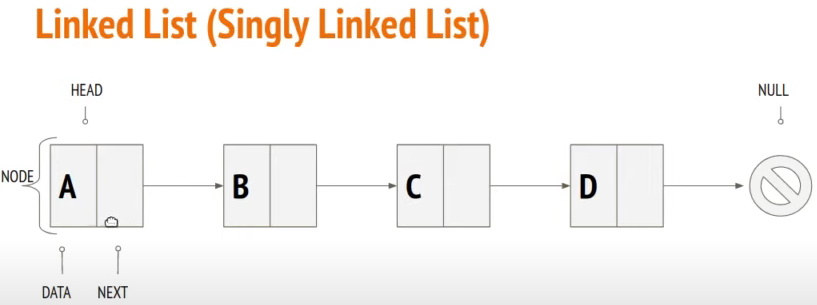

In [ ]:
# YouTube Link: https://www.youtube.com/watch?v=FSsriWQ0qYE
class Node:
    def __init__(self, data):
        '''Every node consists of some data and a pointer to next node. 
        Last node points to None.
        '''
        self.data = data
        self.next = None


class LinkedList:
    def __init__(self):
        self.head = None

    def print_list(self):
        cur_node = self.head
        while cur_node:
            print(cur_node.data)
            cur_node = cur_node.next

    def append(self, data):
        new_node = Node(data)

        if self.head is None: #If we append the first element
            self.head = new_node
            return

        last_node = self.head # at first last_node points to head (beginning of list)
        while last_node.next: # while next pointer is not null
            last_node = last_node.next # move head pointer to the right
        last_node.next = new_node

    def prepend(self, data):
        '''Add Node to the beginning of the list
        '''
        new_node = Node(data)

        new_node.next = self.head
        self.head = new_node # move the head to new element at the beginning

    def insert_after_node(self, prev_node, data):

        if not prev_node:
            print("Previous node is not in the list")
            return 

        new_node = Node(data)

        new_node.next = prev_node.next
        prev_node.next = new_node
        
        
    #For deletion we assume that the data is unique in each node
    def delete_node(self, key):

        cur_node = self.head

        if cur_node and cur_node.data == key:
            self.head = cur_node.next
            cur_node = None
            return

        prev = None 
        while cur_node and cur_node.data != key:
            prev = cur_node
            cur_node = cur_node.next

        if cur_node is None: #if cur_node is None then the element is not in the list
            return 

        prev.next = cur_node.next
        cur_node = None

    def delete_node_at_pos(self, pos):

        cur_node = self.head

        if pos == 0:
            self.head = cur_node.next
            cur_node = None
            return

        prev = None
        count = 0
        while cur_node and count != pos:
            prev = cur_node 
            cur_node = cur_node.next
            count += 1

        if cur_node is None:
            return 

        prev.next = cur_node.next
        cur_node = None
        
        
        
    def len_iterative(self):

        count = 0
        cur_node = self.head

        while cur_node:
            count += 1
            cur_node = cur_node.next
        return count

    def len_recursive(self, node):
        if node is None:
            return 0
        return 1 + self.len_recursive(node.next)
  
        
        
    '''swap by changing the next attribute of node'''
    def swap_nodes(self, key_1, key_2):

        if key_1 == key_2:
            return 

        prev_1 = None 
        curr_1 = self.head 
        while curr_1 and curr_1.data != key_1:
            # while curr_1 is not none(at the end of the list)
            prev_1 = curr_1 
            curr_1 = curr_1.next

        prev_2 = None 
        curr_2 = self.head 
        while curr_2 and curr_2.data != key_2:
            prev_2 = curr_2 
            curr_2 = curr_2.next

        if not curr_1 or not curr_2:
            # If either of these are None then a key doens't exist in list
            return 

        if prev_1:
            prev_1.next = curr_2
        else:
            self.head = curr_2

        if prev_2:
            prev_2.next = curr_1
        else:
            self.head = curr_1

        curr_1.next, curr_2.next = curr_2.next, curr_1.next
        
    ''' Alternate swap node function , swap by changing the data attribute of node '''
    def swap_nodes_alt(self, key_1, key_2):
        if key_1 == key_2:
            return
        curr  = self.head
        x , y = None , None # Assign None to avoid reference error
        key_count=0
        while curr : # going through the whole linked list
            #!TODO! in order to optimize it, break when we 
            if curr.data == key_1:
                x = curr # key_1 found
                key_count+=1
            if curr.data == key_2:
                y =curr # key_2 found
                key_count+=1
            if key_count ==2:
                break
            curr = curr.next
        
        if x and y: # Check if both key's exist
            x.data , y.data = y.data , x.data
        else : 
            return
        
        
    def print_helper(self, node, name):
        if node is None:
            print(name + ": None")
        else:
            print(name + ":" + node.data)

    def reverse_iterative(self):

        prev = None 
        cur = self.head
        while cur:
            nxt = cur.next
            cur.next = prev
            
            self.print_helper(prev, "PREV")
            self.print_helper(cur, "CUR")
            self.print_helper(nxt, "NXT")
            print("\n")

            prev = cur 
            cur = nxt 
        self.head = prev

    def reverse_recursive(self):

        def _reverse_recursive(cur, prev):
            if not cur:
                return prev

            nxt = cur.next
            cur.next = prev
            prev = cur 
            cur = nxt 
            return _reverse_recursive(cur, prev)

        self.head = _reverse_recursive(cur=self.head, prev=None)


        
        

llist = LinkedList()
llist.append("A")
llist.append("B")
llist.append("C")
llist.append("D")

# llist.prepend("E")
llist.insert_after_node(llist.head.next, "E")

llist.print_list()

## Queue

- FIFO: (First In First Out)

https://stackabuse.com/stacks-and-queues-in-python/
https://stackoverflow.com/questions/17635811/why-l-insert0-i-is-slower-than-l-appendi-in-python
https://www.geeksforgeeks.org/queue-in-python/


https://realpython.com/linked-lists-python/

## Stack

- LIFO (Last In First Out)

- Is it implemented by a list using append and pop??? YES! Actually list is more versatile since it has more operations to remove in middle or add in middle. If you restict a list with append and pop then you get a stack!
https://stackoverflow.com/questions/38510140/difference-between-a-list-a-stack-in-python#:~:text=A%20stack%20is%20a%20data,list%20object%20to%20implement%20one.&text=Lists%20on%20the%20other%20hand,elements%20anywhere%20in%20the%20list.



https://realpython.com/linked-lists-python/

In [ ]:
from collections import namedtuple

class _Entry(namedtuple('_Entry', 'value next')):
    def _repr_assist(self, postfix):
        r = repr(self.value) + postfix
        if self.next is not None:
            return self.next._repr_assist(', ' + r)
        return r

class Stack(object):
    def __init__(self):
        self.top = None
    def push(self, value):
        self.top = _Entry(value, self.top)
    def pop(self):
        if self.top is None:
            raise ValueError("Can't pop from an empty stack")
        res, self.top = self.top.value, self.top.next
        return res
    def __repr__(self):
        if self.top is None: return '[]'
        return '[' + self.top._repr_assist(']')

In [ ]:
>>> stack = Stack()
>>> stack.push(3)
>>> stack.push(4)
>>> stack.push(5)
>>> stack
[3, 4, 5]
>>> stack.pop()
5
>>> stack.push(6)
>>> stack
[3, 4, 6]
>>> stack.pop()
6
>>> stack.pop()
4
>>> stack.pop()
3
>>> stack
[]

## From another tutorial

In [ ]:
# YouTube Video: https://www.youtube.com/watch?v=cXxkvq3u_f8


class Stack():
    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def is_empty(self):
        return self.items == []

    def peek(self):
        if not self.is_empty():
            return self.items[-1]

    def get_stack(self):
        return self.items


def reverse_string(stack, input_str):

    # Loop through the string and push contents
    # character by character onto stack.
    for i in range(len(input_str)):
        stack.push(input_str[i])

    rev_str = ""
    while not stack.is_empty():
        rev_str += stack.pop()

    return rev_str


stack = Stack()    
input_str = "Hello"

print(reverse_string(stack, input_str))


#print(input_str[::-1])


## Amortised time complexity

https://en.wikipedia.org/wiki/Amortized_analysis

https://stackoverflow.com/questions/33044883/why-is-the-time-complexity-of-pythons-list-append-method-o1

## O, $\Theta$, $\Omega$  time complexity

https://stackoverflow.com/questions/471199/what-is-the-difference-between-%CE%98n-and-on#:~:text=O(n)%20represents%20upper%20bound,(n)%20represents%20lower%20bound.

How to calculate O(n), Theta(n) Omega(n) etc...

https://www.geeksforgeeks.org/analysis-of-algorithms-set-3asymptotic-notations/

https://stackoverflow.com/questions/49880681/time-complexity-understanding-big-theta